# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [155]:
# import libraries
import pandas as pd
pd.set_option("max_colwidth", 500)
from sqlalchemy import create_engine

In [156]:
import datetime

In [157]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [158]:
# load data from database
engine = create_engine('sqlite:///la_udacity_project.db')
query = "SELECT * FROM disaster_response_data"
df = pd.read_sql_query(query, engine)


In [159]:
df.shape

(26216, 40)

In [160]:
X.shape

(26216,)

In [161]:
Y.shape

(26216, 36)

In [162]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)
genre_names

['direct', 'news', 'social']

<AxesSubplot:xlabel='genre'>

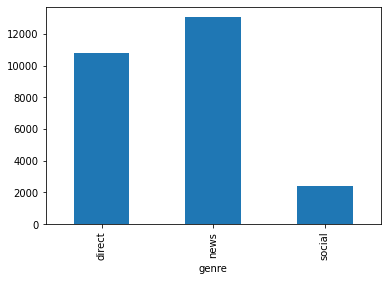

In [164]:
genre_counts.plot(kind = 'bar')

In [165]:
class_counts = df.drop(columns = ['id', 'message', 'original', 'genre', 'related']).sum(axis = 0).sort_values(ascending = False)
class_names = list(class_counts.index)
class_names

['aid_related',
 'weather_related',
 'direct_report',
 'request',
 'other_aid',
 'food',
 'earthquake',
 'storm',
 'shelter',
 'floods',
 'medical_help',
 'infrastructure_related',
 'water',
 'other_weather',
 'buildings',
 'medical_products',
 'transport',
 'death',
 'other_infrastructure',
 'refugees',
 'military',
 'search_and_rescue',
 'money',
 'electricity',
 'cold',
 'security',
 'clothing',
 'aid_centers',
 'missing_people',
 'hospitals',
 'fire',
 'tools',
 'shops',
 'offer',
 'child_alone']

In [166]:
# check for null messages
df['message'].isna().sum()

0

In [167]:
# check for empty messages
df['len'] = df['message'].str.len()
df[df.len == 0].head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,len


In [168]:
df = df.drop(columns = ['len'])

In [169]:
df['genre'].value_counts()

news      13054
direct    10766
social     2396
Name: genre, dtype: int64

In [170]:
df['related'].value_counts()

1    19906
0     6122
2      188
Name: related, dtype: int64

In [171]:
df.nunique()

id                        26180
message                   26177
original                   9630
genre                         3
related                       3
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
child_alone                   1
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_in

In [172]:
# child_alone only has one value in the training set
df = df.drop(columns = ['child_alone'])

### Additional transformations on the text to improve results

In [173]:
# convert characters to lowercase
def lowercase(pdf, col):
    pdf[col]=pdf[col].apply(lambda x: x.lower())
    return pdf
df = lowercase(df, 'message')

In [174]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [175]:
import re

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

df['message']= df['message'].apply(lambda x:expand_contractions(x))

### define X and Y

In [178]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [202]:
X = df['message'].values
Y = df.drop(columns = ['id', 'message', 'original', 'genre', 'related']).values

### 2. Write a tokenization function to process your text data

In [204]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authorization Required>


False

In [205]:
# stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [206]:
stopwords_nltk = list(stopwords.words("english"))
combined_stopwords = stopwords_nltk

In [207]:
def tokenize(text):
    """
    Splits text into tokens
    
    Arguments:
    text (str): text to split
    Returns:
    tokens (list): list of tokens in the text
    
    """
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize 
    from nltk.stem.wordnet import WordNetLemmatizer

    stop_words = stopwords.words("english")
    # convert text to lowercase
    text = text.lower()
    
    # remove punctuation
    import re
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    
    words = word_tokenize(text) 

    words = [w for w in words if w not in stop_words] 
    
    lemmatizer = WordNetLemmatizer()    
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return tokens

In [208]:
X[100]

'the message might be saying that they have been stuck in the presidential palace ( pal ) since the same tuesday ( as the quake ). they need water. the message says they are not finding a little water. no names, no number of people given.'

In [209]:
# test tokenization function
x0_tokens= tokenize(X[100])

In [210]:
x0_tokens

['message',
 'might',
 'saying',
 'stuck',
 'presidential',
 'palace',
 'pal',
 'since',
 'tuesday',
 'quake',
 'need',
 'water',
 'message',
 'say',
 'finding',
 'little',
 'water',
 'name',
 'number',
 'people',
 'given']

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [211]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer(smooth_idf=False))
        ])),
    ])),

    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [212]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [213]:
# split X and Y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [214]:
# check that the test and train split both have samples with every class
def check_unique_labels(array):
    import numpy as np
    unique_values = np.apply_along_axis(np.unique, axis=0, arr=array)
    # Print the unique values in each column
    for col_idx, col_values in enumerate(unique_values.T):
        print(f"Column {col_idx+1}: {col_values}")


In [215]:
y_train.shape

(19662, 34)

In [217]:
check_unique_labels(y_train)

Column 1: [0 1]
Column 2: [0 1]
Column 3: [0 1]
Column 4: [0 1]
Column 5: [0 1]
Column 6: [0 1]
Column 7: [0 1]
Column 8: [0 1]
Column 9: [0 1]
Column 10: [0 1]
Column 11: [0 1]
Column 12: [0 1]
Column 13: [0 1]
Column 14: [0 1]
Column 15: [0 1]
Column 16: [0 1]
Column 17: [0 1]
Column 18: [0 1]
Column 19: [0 1]
Column 20: [0 1]
Column 21: [0 1]
Column 22: [0 1]
Column 23: [0 1]
Column 24: [0 1]
Column 25: [0 1]
Column 26: [0 1]
Column 27: [0 1]
Column 28: [0 1]
Column 29: [0 1]
Column 30: [0 1]
Column 31: [0 1]
Column 32: [0 1]
Column 33: [0 1]
Column 34: [0 1]


In [218]:
check_unique_labels(y_test)

Column 1: [0 1]
Column 2: [0 1]
Column 3: [0 1]
Column 4: [0 1]
Column 5: [0 1]
Column 6: [0 1]
Column 7: [0 1]
Column 8: [0 1]
Column 9: [0 1]
Column 10: [0 1]
Column 11: [0 1]
Column 12: [0 1]
Column 13: [0 1]
Column 14: [0 1]
Column 15: [0 1]
Column 16: [0 1]
Column 17: [0 1]
Column 18: [0 1]
Column 19: [0 1]
Column 20: [0 1]
Column 21: [0 1]
Column 22: [0 1]
Column 23: [0 1]
Column 24: [0 1]
Column 25: [0 1]
Column 26: [0 1]
Column 27: [0 1]
Column 28: [0 1]
Column 29: [0 1]
Column 30: [0 1]
Column 31: [0 1]
Column 32: [0 1]
Column 33: [0 1]
Column 34: [0 1]


In [220]:
print("train start time: ", datetime.datetime.now())
pipeline.fit(X_train, y_train)
print("train end time: ", datetime.datetime.now())

train start time:  2024-05-18 20:23:38.951078
train end time:  2024-05-18 20:32:17.283856


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [68]:
def calculate_model_metrics(X_test, y_test, y_pred):
    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    
    # accuracy for each class
    accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    print("Accuracy for each output:", accuracies)

In [221]:
# metrics on train
y_train_pred = pipeline.predict(X_train)

In [224]:
calculate_model_metrics(X_train, y_train, y_train_pred)

Accuracy: 0.9957277998169057
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3413
           1       1.00      0.98      0.99        85
           2       1.00      1.00      1.00      8238
           3       1.00      0.99      1.00      1627
           4       1.00      1.00      1.00       984
           5       1.00      1.00      1.00       547
           6       1.00      0.98      0.99       371
           7       1.00      1.00      1.00       671
           8       1.00      1.00      1.00      1276
           9       1.00      1.00      1.00      2233
          10       1.00      1.00      1.00      1747
          11       1.00      1.00      1.00       315
          12       1.00      1.00      1.00       462
          13       1.00      1.00      1.00       234
          14       1.00      1.00      1.00       666
          15       1.00      1.00      1.00       911
          16       1.00      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [222]:
# metrics on test
y_pred = pipeline.predict(X_test)

In [223]:
calculate_model_metrics(X_test, y_test, y_pred)

Accuracy: 0.4224900823924321
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.51      0.63      1061
           1       0.00      0.00      0.00        33
           2       0.75      0.70      0.72      2622
           3       0.53      0.07      0.12       457
           4       0.84      0.08      0.14       329
           5       0.71      0.06      0.10       177
           6       0.33      0.01      0.02       100
           7       0.61      0.06      0.11       189
           8       0.86      0.30      0.45       396
           9       0.85      0.61      0.71       690
          10       0.82      0.39      0.53       567
          11       0.77      0.11      0.19        90
          12       0.50      0.01      0.03       142
          13       1.00      0.02      0.03        64
          14       0.60      0.01      0.03       209
          15       0.82      0.11      0.20       283
          16       0.58      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



### 6. Improve your model
Use grid search to find better parameters. 

In [225]:
pipeline.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('text_pipeline',
                                   Pipeline(steps=[('vect',
                                                    CountVectorizer(tokenizer=<function tokenize at 0x7fb6ecd5ed08>)),
                                                   ('tfidf',
                                                    TfidfTransformer(smooth_idf=False))]))])),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'features': FeatureUnion(transformer_list=[('text_pipeline',
                                 Pipeline(steps=[('vect',
                                                  CountVectorizer(tokenizer=<function tokenize at 0x7fb6ecd5ed08>)),
                                                 ('tfidf',
                                                  TfidfTransformer(smooth_idf=False))]))]),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'features__n_jobs': None,


In [226]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'features__text_pipeline__vect__ngram_range': ((1, 1), (1, 2)),
    'clf__estimator__n_estimators': [100, 150],
    'clf__estimator__min_samples_split': [5, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters, cv = 5) #n_jobs = -1)

In [52]:
import datetime
print("start time: ", datetime.datetime.now())
cv.fit(X_train, y_train)
print("end_time: ", datetime.datetime.now())

end_time:  2024-05-18 03:32:33.195827


In [53]:
print("\nBest Parameters:", cv.best_params_)


Best Parameters: {'clf__estimator__min_samples_split': 5, 'clf__estimator__n_estimators': 100, 'features__text_pipeline__vect__ngram_range': (1, 2)}


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [87]:
best_estimator = cv.best_estimator_

In [228]:
type(best_estimator)

sklearn.pipeline.Pipeline

In [ ]:
# check performance on train to check for overfitting


In [235]:
y_pred_train = best_estimator.predict(X_train)
calculate_model_metrics(X_train, y_train, y_pred_train)

Accuracy: 0.8370969382565354
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3413
           1       1.00      0.64      0.78        85
           2       0.95      0.92      0.93      8238
           3       0.99      0.75      0.85      1627
           4       0.99      0.76      0.86       984
           5       1.00      0.74      0.85       547
           6       1.00      0.70      0.82       371
           7       0.98      0.78      0.87       671
           8       0.99      0.83      0.90      1276
           9       0.97      0.89      0.93      2233
          10       0.98      0.85      0.91      1747
          11       0.99      0.75      0.85       315
          12       1.00      0.72      0.84       462
          13       1.00      0.75      0.86       234
          14       0.99      0.74      0.85       666
          15       0.99      0.77      0.87       911
          16       1.00      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [229]:
y_pred = best_estimator.predict(X_test)

In [230]:
calculate_model_metrics(X_test, y_test, y_pred)

Accuracy: 0.8414708574916082
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1061
           1       1.00      0.64      0.78        33
           2       0.95      0.92      0.94      2622
           3       0.99      0.74      0.84       457
           4       1.00      0.78      0.88       329
           5       0.99      0.77      0.86       177
           6       1.00      0.73      0.84       100
           7       1.00      0.74      0.85       189
           8       0.99      0.83      0.90       396
           9       0.97      0.87      0.92       690
          10       0.98      0.84      0.91       567
          11       1.00      0.72      0.84        90
          12       0.99      0.73      0.84       142
          13       1.00      0.66      0.79        64
          14       0.99      0.75      0.85       209
          15       1.00      0.77      0.87       283
          16       1.00      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [231]:
def test_other_algorithms(X_train, y_train, X_test, y_test, classifier):
    update_pipeline = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize, ngram_range = (1,2))),
                ('tfidf', TfidfTransformer(smooth_idf=False))
            ])),
        ])),

        ('clf', classifier)
    ])
    
    update_pipeline.fit(X_train, y_train)
    
    # predict on test
    y_pred = update_pipeline.predict(X_test)
    
    calculate_model_metrics(X_test, y_test, y_pred)
    

In [232]:
# test K neighbors
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = MultiOutputClassifier(KNeighborsClassifier())

In [233]:
test_other_algorithms(X_train, y_train, X_test, y_test, classifier)

Accuracy: 0.4525480622520598
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.01      0.03      1061
           1       0.00      0.00      0.00        33
           2       0.70      0.01      0.01      2622
           3       0.00      0.00      0.00       457
           4       0.00      0.00      0.00       329
           5       0.00      0.00      0.00       177
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       189
           8       1.00      0.01      0.02       396
           9       0.89      0.01      0.02       690
          10       0.00      0.00      0.00       567
          11       1.00      0.01      0.02        90
          12       0.00      0.00      0.00       142
          13       0.00      0.00      0.00        64
          14       0.00      0.00      0.00       209
          15       1.00      0.01      0.02       283
          16       0.38      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



In [234]:
# test logistic regression
from sklearn.linear_model import LogisticRegression
classifier = MultiOutputClassifier(LogisticRegression())

test_other_algorithms(X_train, y_train, X_test, y_test, classifier)

Accuracy: 0.41653951785169363
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66      1061
           1       0.00      0.00      0.00        33
           2       0.72      0.72      0.72      2622
           3       0.62      0.15      0.25       457
           4       0.82      0.14      0.24       329
           5       0.83      0.03      0.05       177
           6       0.00      0.00      0.00       100
           7       0.67      0.07      0.13       189
           8       0.74      0.55      0.63       396
           9       0.81      0.62      0.70       690
          10       0.81      0.42      0.55       567
          11       0.81      0.14      0.25        90
          12       0.80      0.03      0.05       142
          13       0.00      0.00      0.00        64
          14       0.70      0.03      0.06       209
          15       0.91      0.19      0.31       283
          16       0.56     

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



### 9. Export your model as a pickle file

In [94]:
import joblib
joblib.dump(best_estimator, 'model.pkl')

['model.pkl']

In [95]:
# test loading model 
loaded_model = joblib.load('model.pkl')

In [96]:
preds_test = loaded_model.predict(X_test)

In [97]:
calculate_model_metrics(X_test, y_test, preds_test)

Accuracy: 0.8379615501983522
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1109
           1       1.00      0.50      0.67        32
           2       0.94      0.92      0.93      2731
           3       0.99      0.73      0.84       496
           4       1.00      0.77      0.87       323
           5       0.98      0.75      0.85       155
           6       1.00      0.75      0.85       114
           7       0.98      0.80      0.88       217
           8       1.00      0.84      0.91       438
           9       0.98      0.89      0.93       785
          10       0.98      0.84      0.91       579
          11       0.99      0.74      0.85        96
          12       1.00      0.76      0.86       157
          13       1.00      0.69      0.82        74
          14       0.98      0.76      0.86       231
          15       0.99      0.81      0.89       286
          16       1.00      

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.



### 10. Use this notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

# References
* Udacity course content
* https://stackoverflow.com/questions/71902957/how-to-use-gridsearchcv-with-multioutputclassifiermlpclassifier-pipeline